In [24]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
data=pd.read_csv("train.csv",sep=",")
data.info()

# Obtener la cantidad de registros por subestación
substation_counts = data['substation'].value_counts().reset_index()
substation_counts.columns = ['substation', 'record_count']

# Mostrar la tabla resultante
print(substation_counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244391 entries, 0 to 244390
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   substation   244391 non-null  object 
 1   date         244391 non-null  object 
 2   consumption  244391 non-null  float64
dtypes: float64(1), object(2)
memory usage: 5.6+ MB
  substation  record_count
0    AJAHUEL         34913
1       BUIN         34913
2      CHENA         34913
3     CNAVIA         34913
4    ELSALTO         34913
5    FLORIDA         34913
6    LOSALME         34913


In [26]:
# Convertir la columna 'date' a datetime
data['date'] = pd.to_datetime(data['date'])

# Establecer la columna 'date' como índice
data.set_index('date', inplace=True)

#ver variables
data.info()

# Verificar la conversión
print(data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244391 entries, 2018-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   substation   244391 non-null  object 
 1   consumption  244391 non-null  float64
dtypes: float64(1), object(1)
memory usage: 5.6+ MB
                    substation  consumption
date                                       
2018-01-01 00:00:00    AJAHUEL   137.330840
2018-01-01 01:00:00    AJAHUEL   124.045549
2018-01-01 02:00:00    AJAHUEL   118.137811
2018-01-01 03:00:00    AJAHUEL   107.899499
2018-01-01 04:00:00    AJAHUEL   100.362069


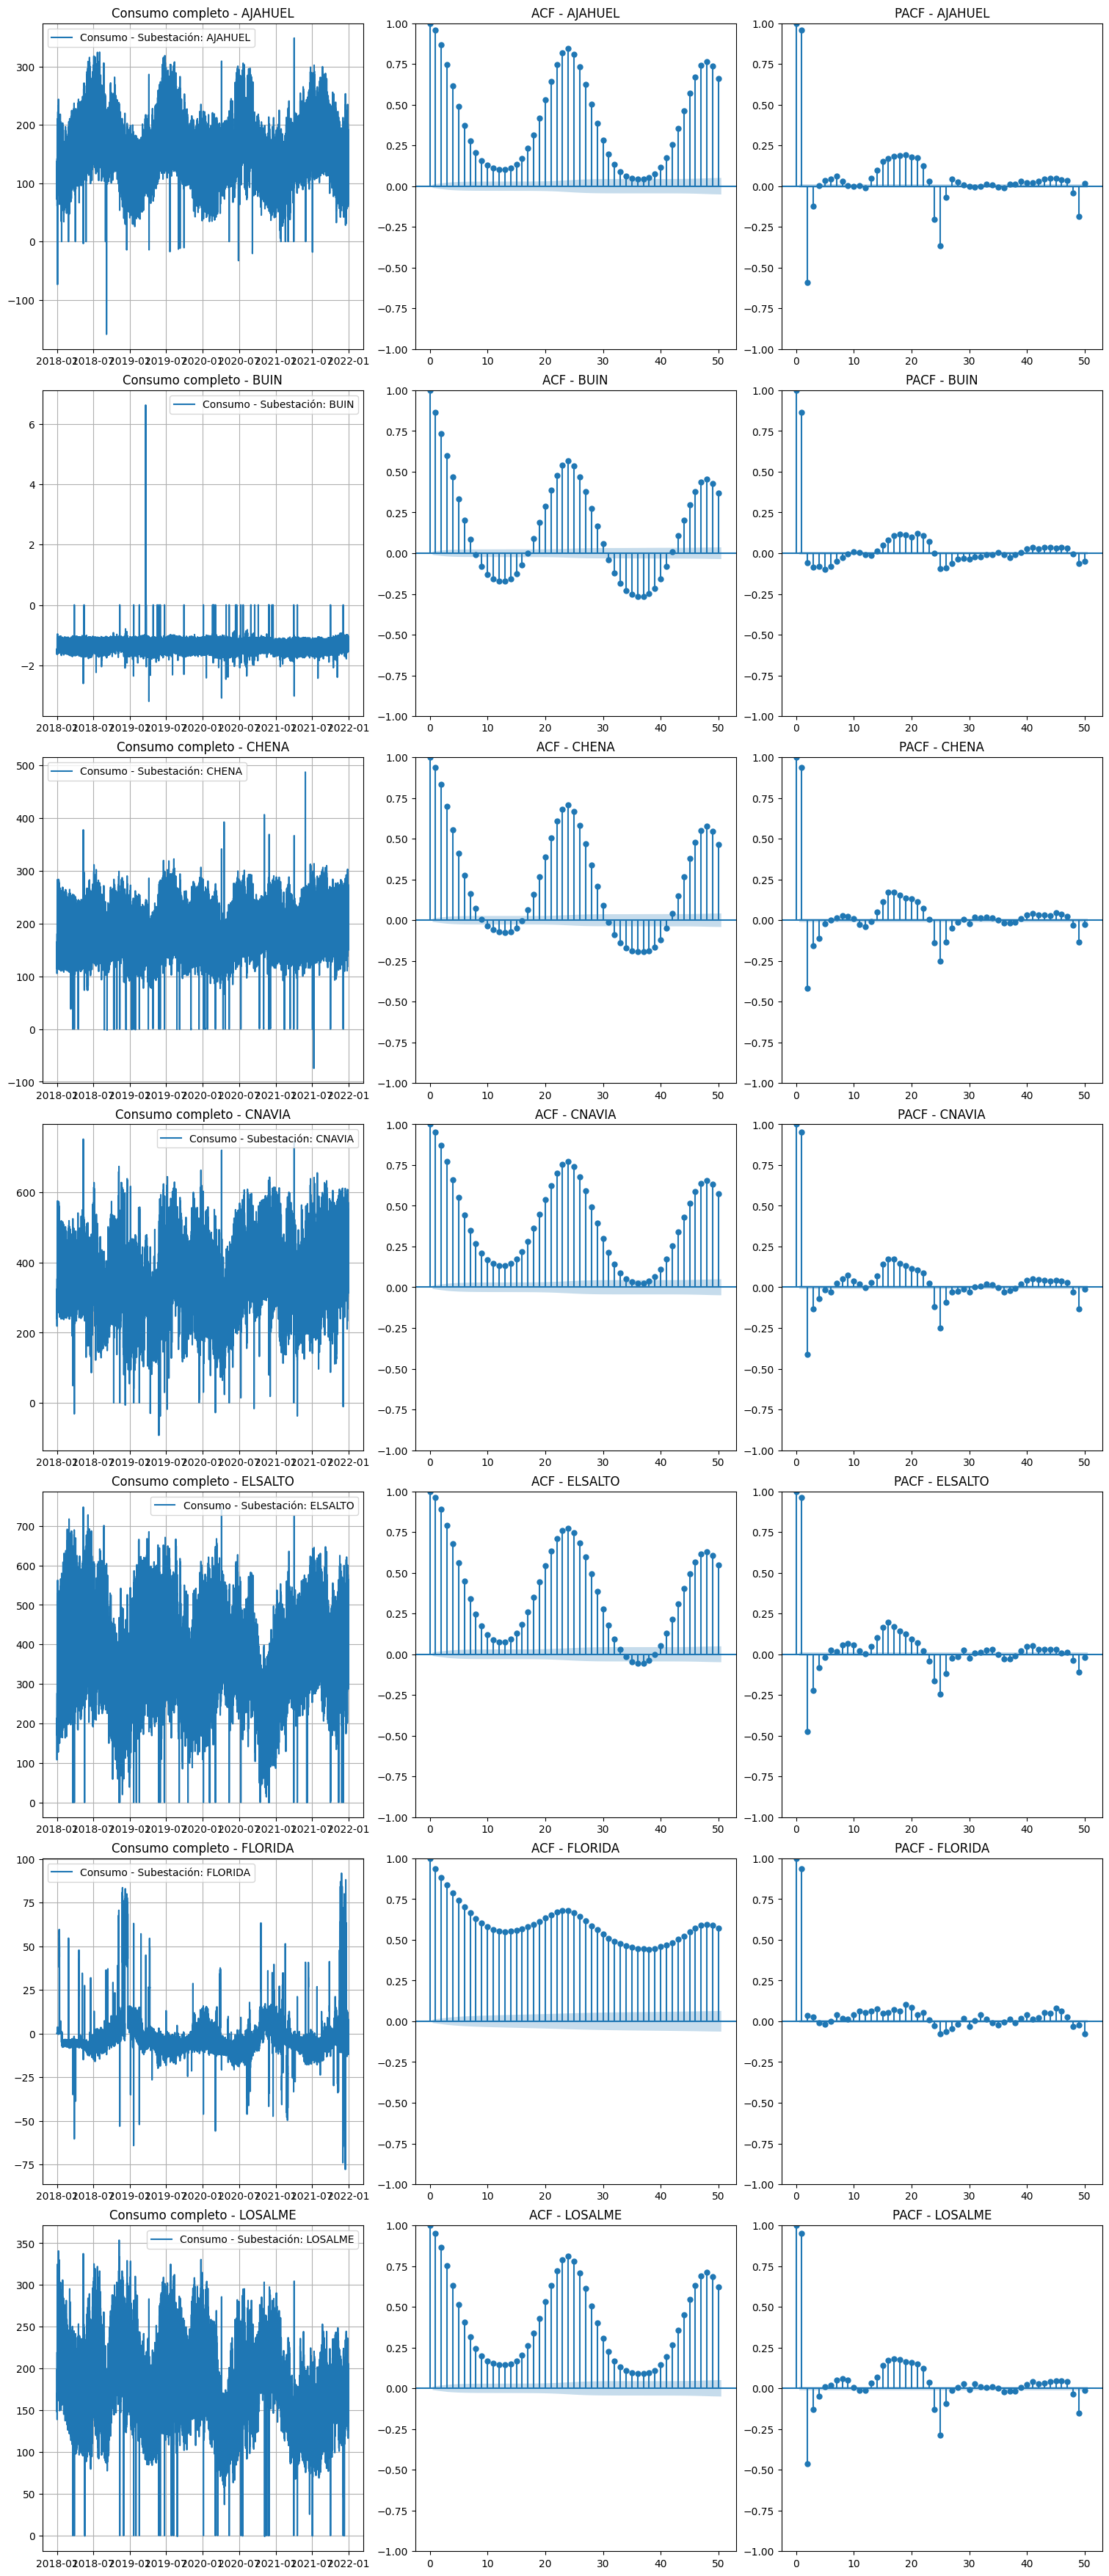

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Establecer el número de lags para los gráficos de autocorrelación
num_lags = 50

# Lista de subestaciones
substations = data['substation'].unique()

# Calcular el número de filas y columnas para los gráficos
n_cols = 3
n_rows = (len(substations) * 3 + n_cols - 1) // n_cols

# Crear figura con subgráficas
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()

# Iterar sobre cada subestación
current_axis = 0
for substation in substations:
    substation_data = data[data['substation'] == substation]['consumption']
    
    # Graficar el consumo
    ax = axes[current_axis]
    ax.plot(substation_data.index, substation_data, label=f'Consumo - Subestación: {substation}')
    ax.set_title(f'Consumo completo - {substation}')
    ax.grid(True)
    ax.legend()
    current_axis += 1
    
    # Graficar ACF
    ax = axes[current_axis]
    plot_acf(substation_data.dropna(), lags=num_lags, ax=ax)
    ax.set_title(f'ACF - {substation}')
    current_axis += 1
    
    # Graficar PACF
    ax = axes[current_axis]
    plot_pacf(substation_data.dropna(), lags=num_lags, ax=ax)
    ax.set_title(f'PACF - {substation}')
    current_axis += 1

# Eliminar ejes no utilizados
for i in range(current_axis, len(axes)):
    fig.delaxes(axes[i])

plt.show()


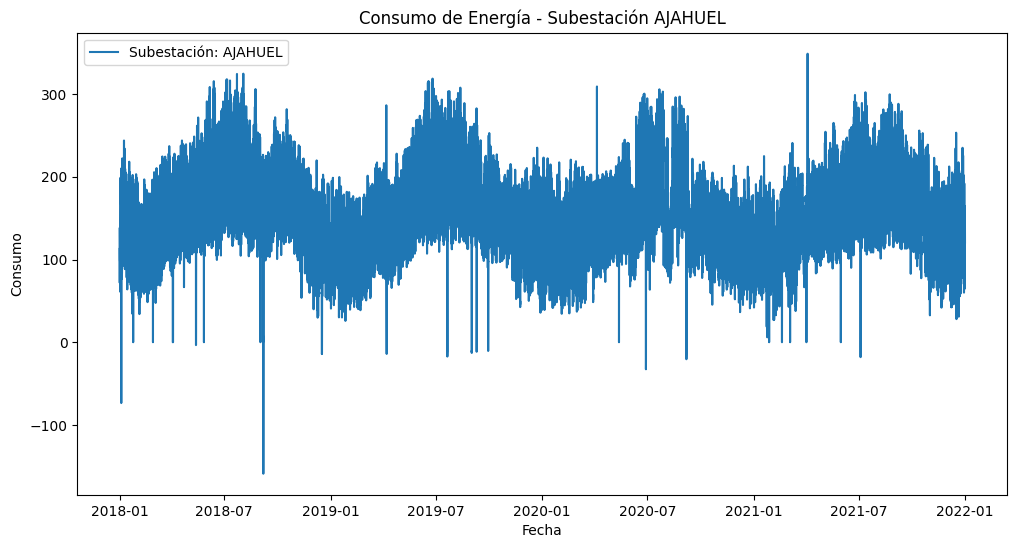

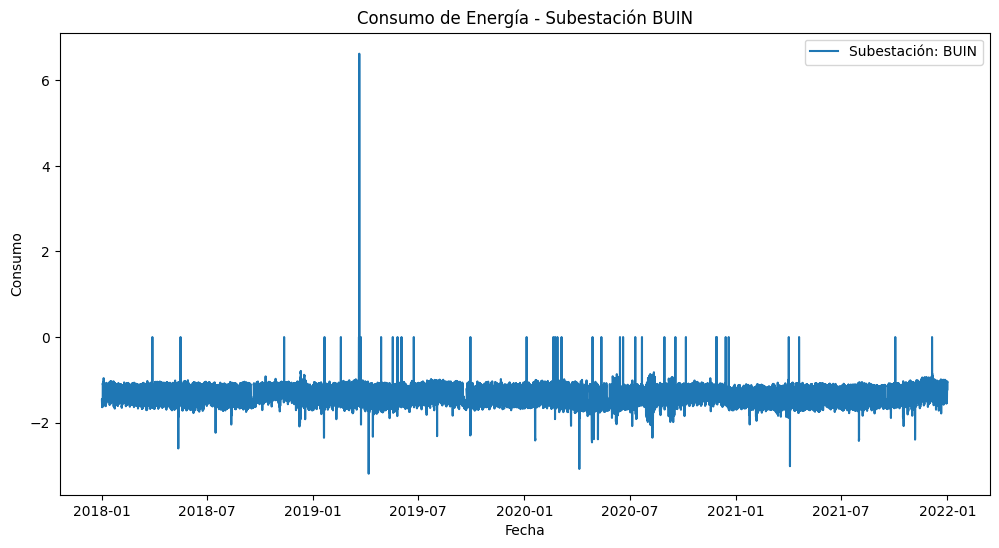

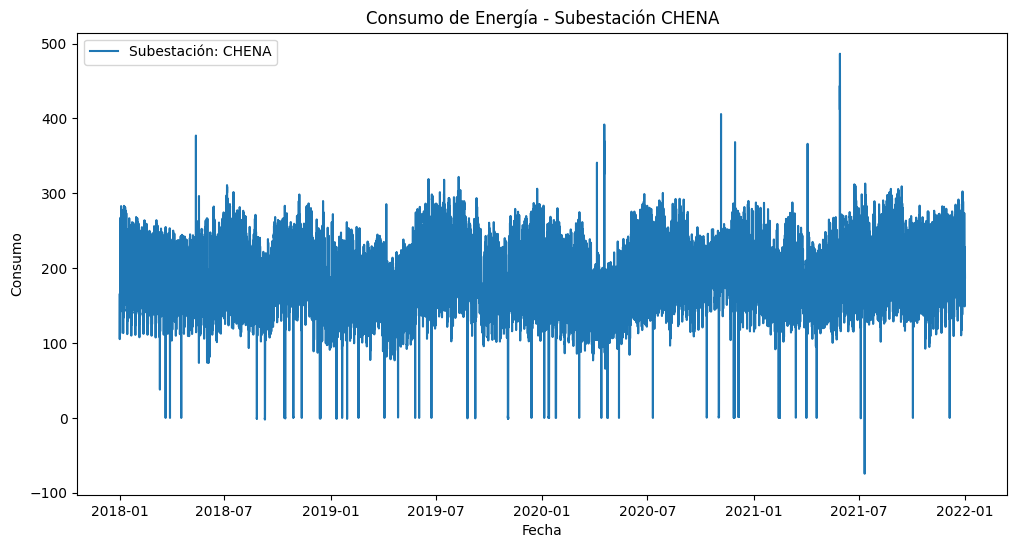

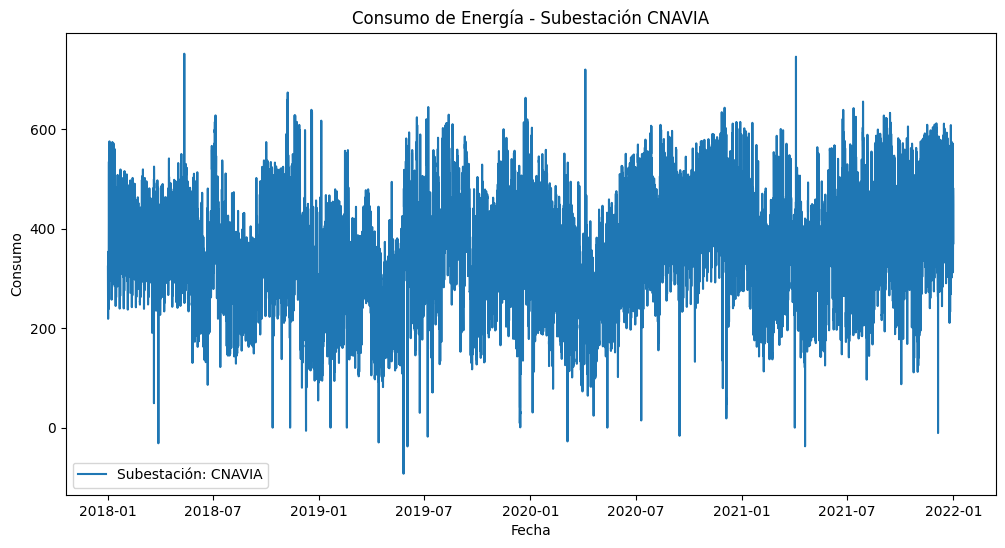

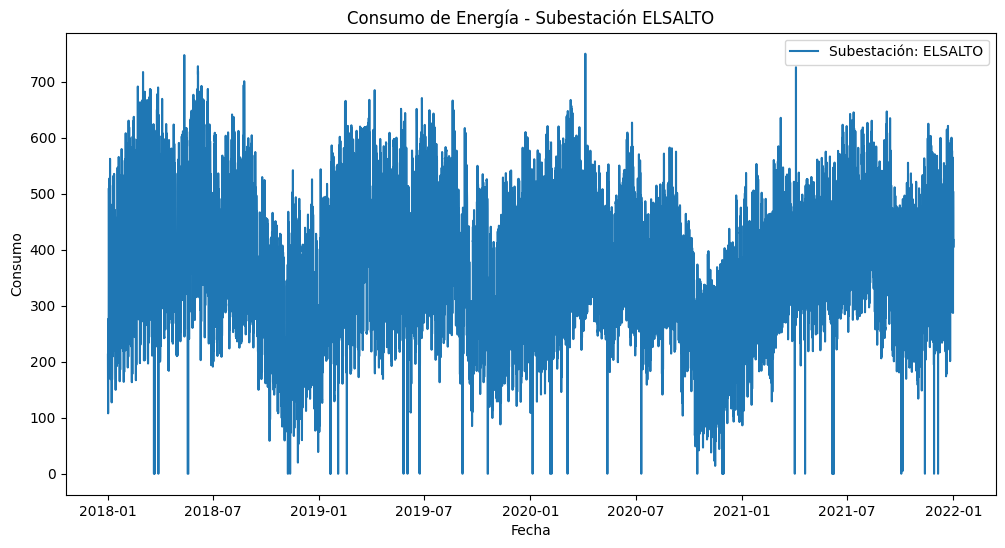

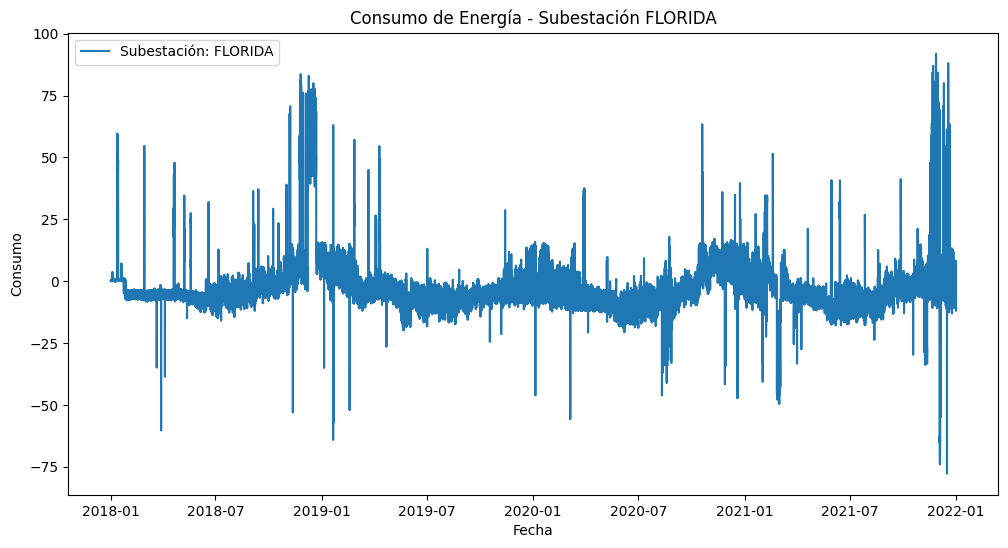

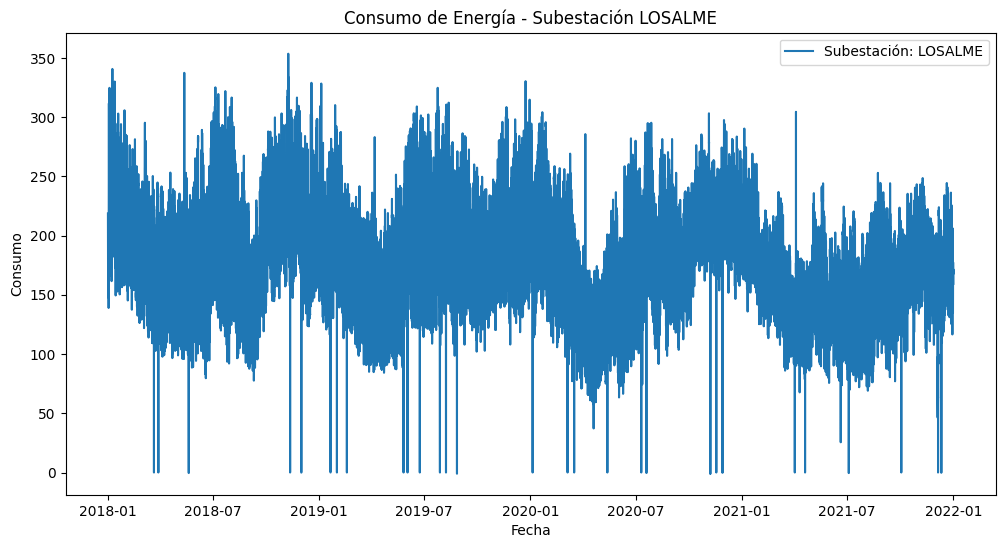

In [22]:
import matplotlib.pyplot as plt

# Lista de subestaciones únicas
substations = data['substation'].unique()

# Crear gráficos de consumo para cada subestación
for substation in substations:
    substation_data = data[data['substation'] == substation]
    plt.figure(figsize=(12, 6))
    plt.plot(substation_data.index, substation_data['consumption'], label=f'Subestación: {substation}')
    plt.xlabel('Fecha')
    plt.ylabel('Consumo')
    plt.title(f'Consumo de Energía - Subestación {substation}')
    plt.legend()
    plt.show()

In [6]:
#y=data["consumption"].to_numpy()
#x=data["date"].to_numpy()

In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

NameError: name 'x' is not defined

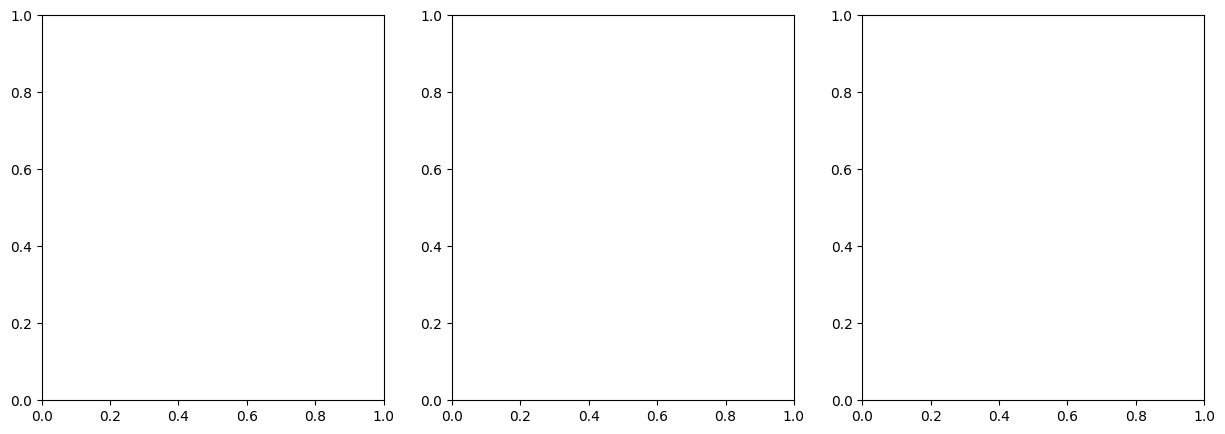

In [14]:
fig, axes=plt.subplots(1,3)
fig.set_size_inches(15,5)
axes[0].plot(x,y)
plot_acf(y,lags=60,ax=axes[1]);
plot_pacf(y,lags=60,ax=axes[2]);

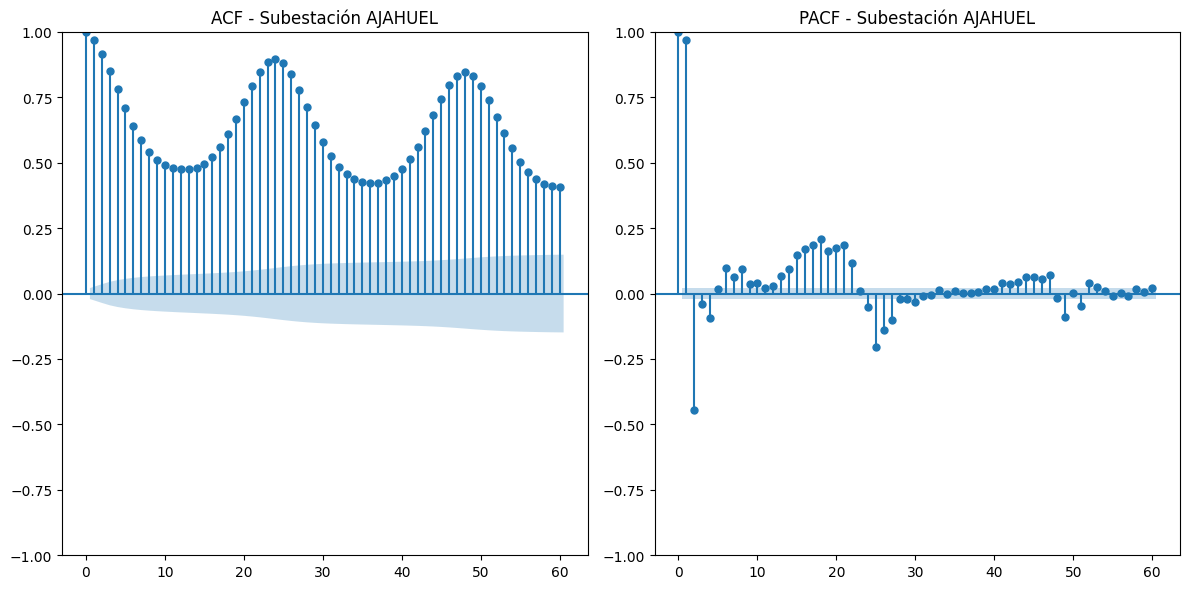

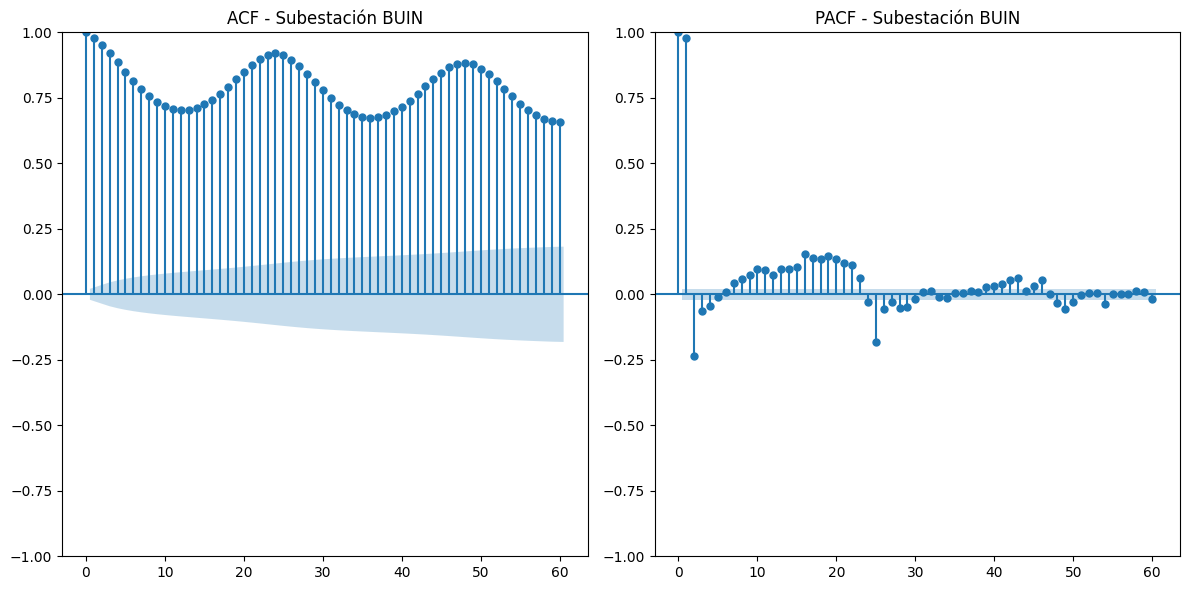

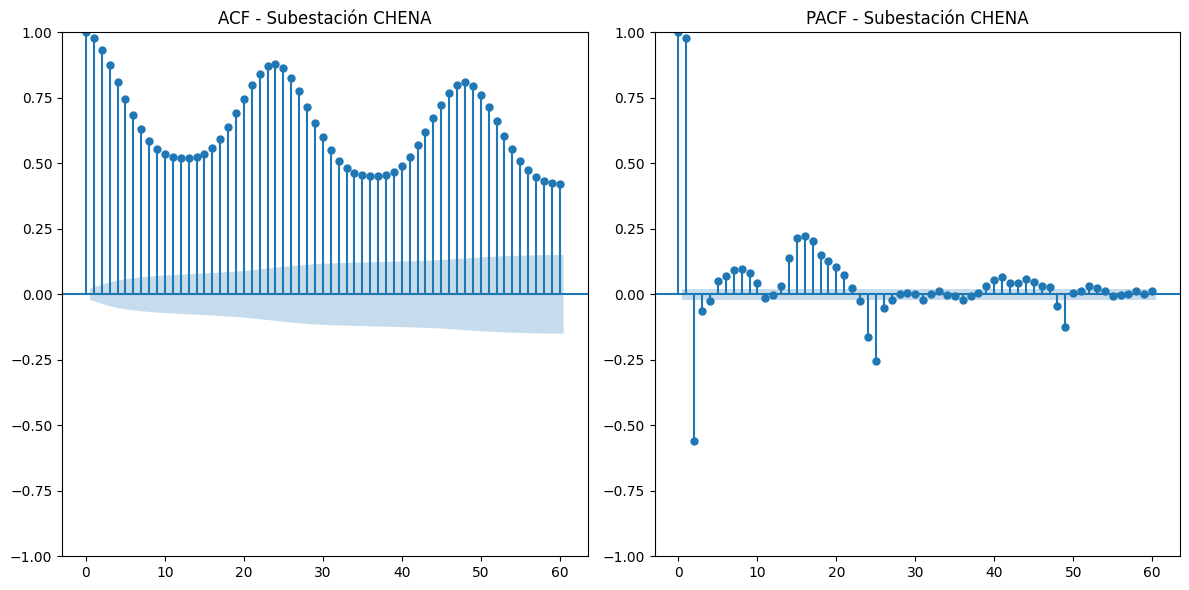

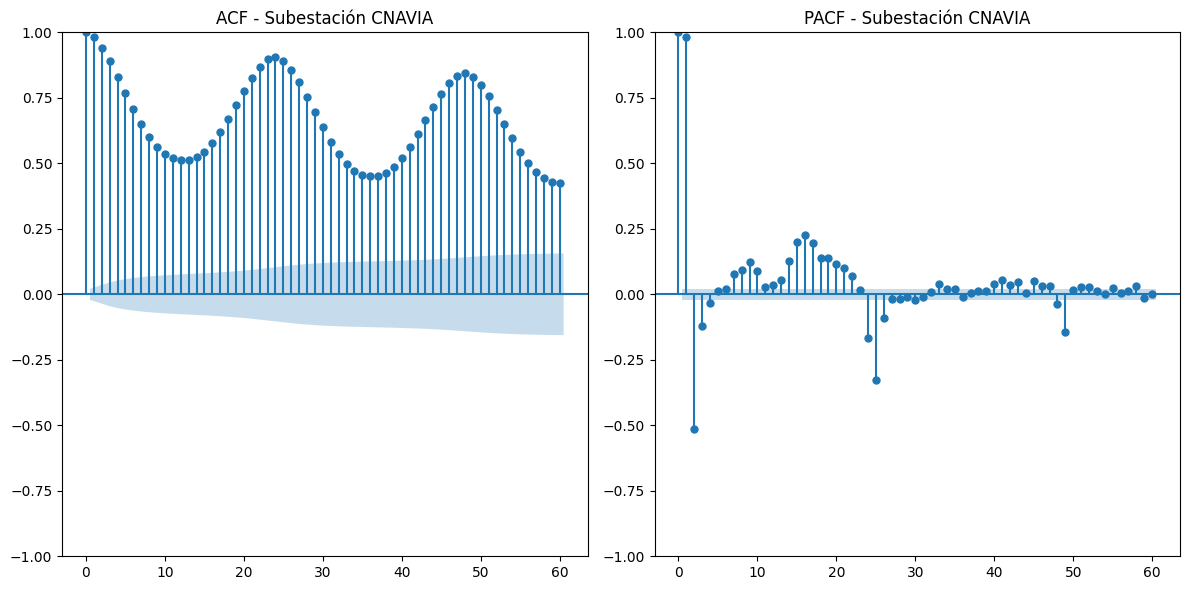

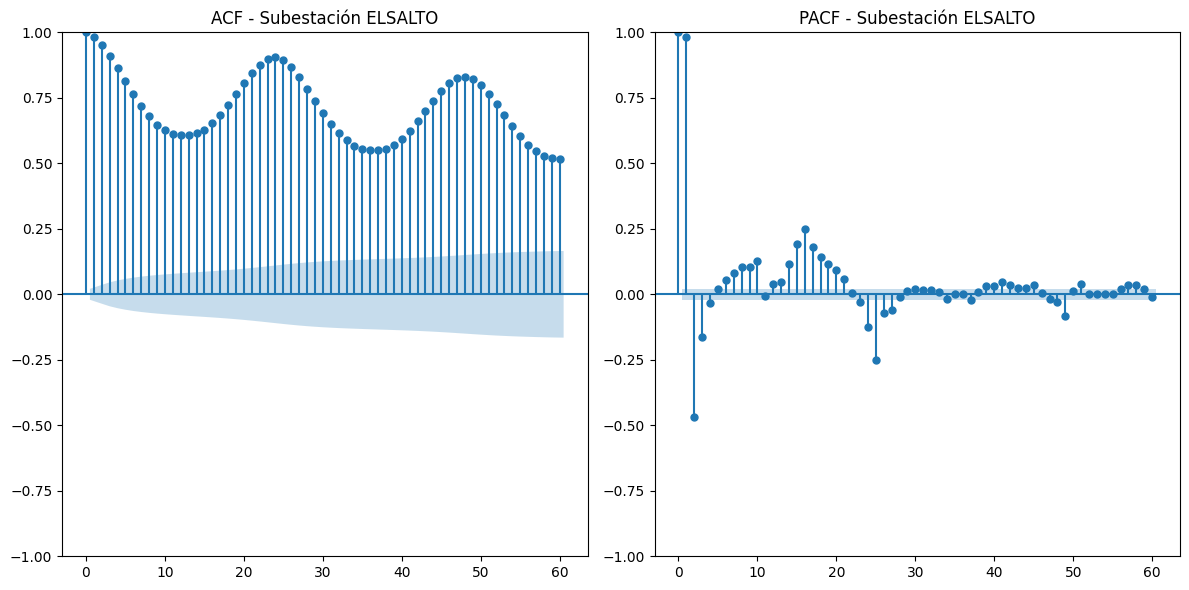

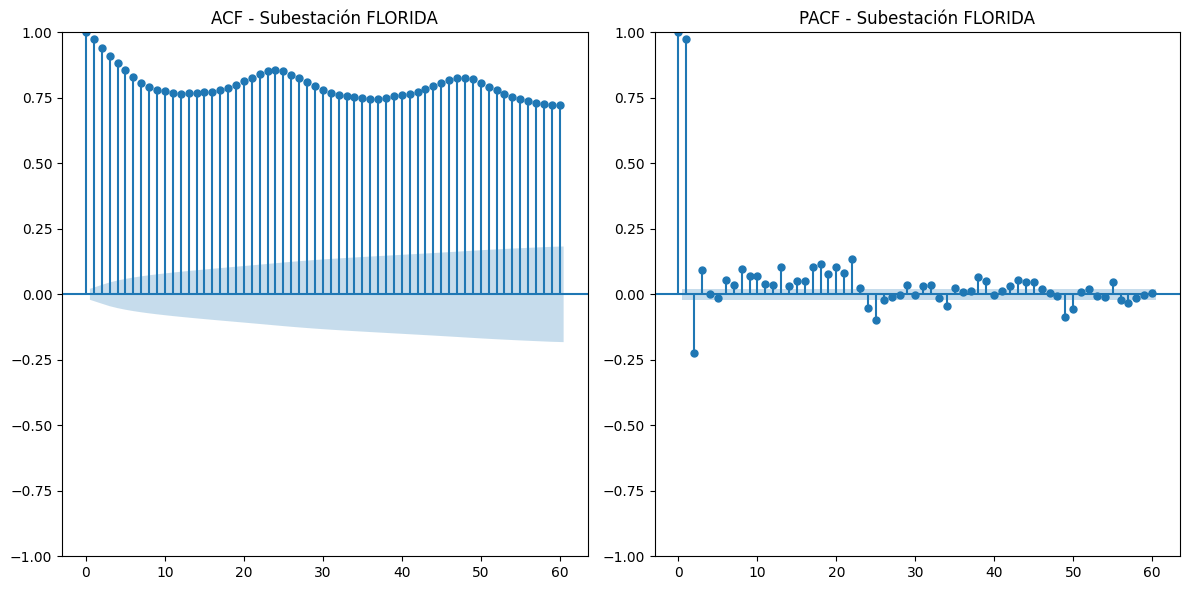

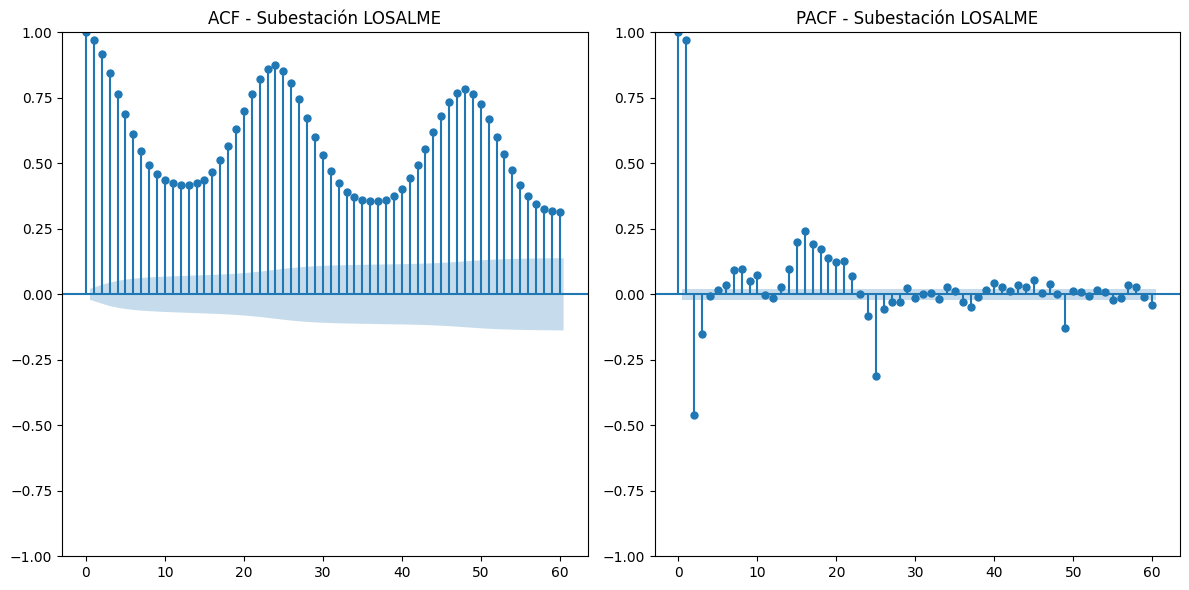

In [39]:
for substation in substations:
    substation_data = data[data['substation'] == substation]['consumption']
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plot_acf(substation_data, lags=60, ax=plt.gca())
    plt.title(f'ACF - Subestación {substation}')
    
    plt.subplot(1, 2, 2)
    plot_pacf(substation_data, lags=60, ax=plt.gca())
    plt.title(f'PACF - Subestación {substation}')
    
    plt.tight_layout()
    plt.show()


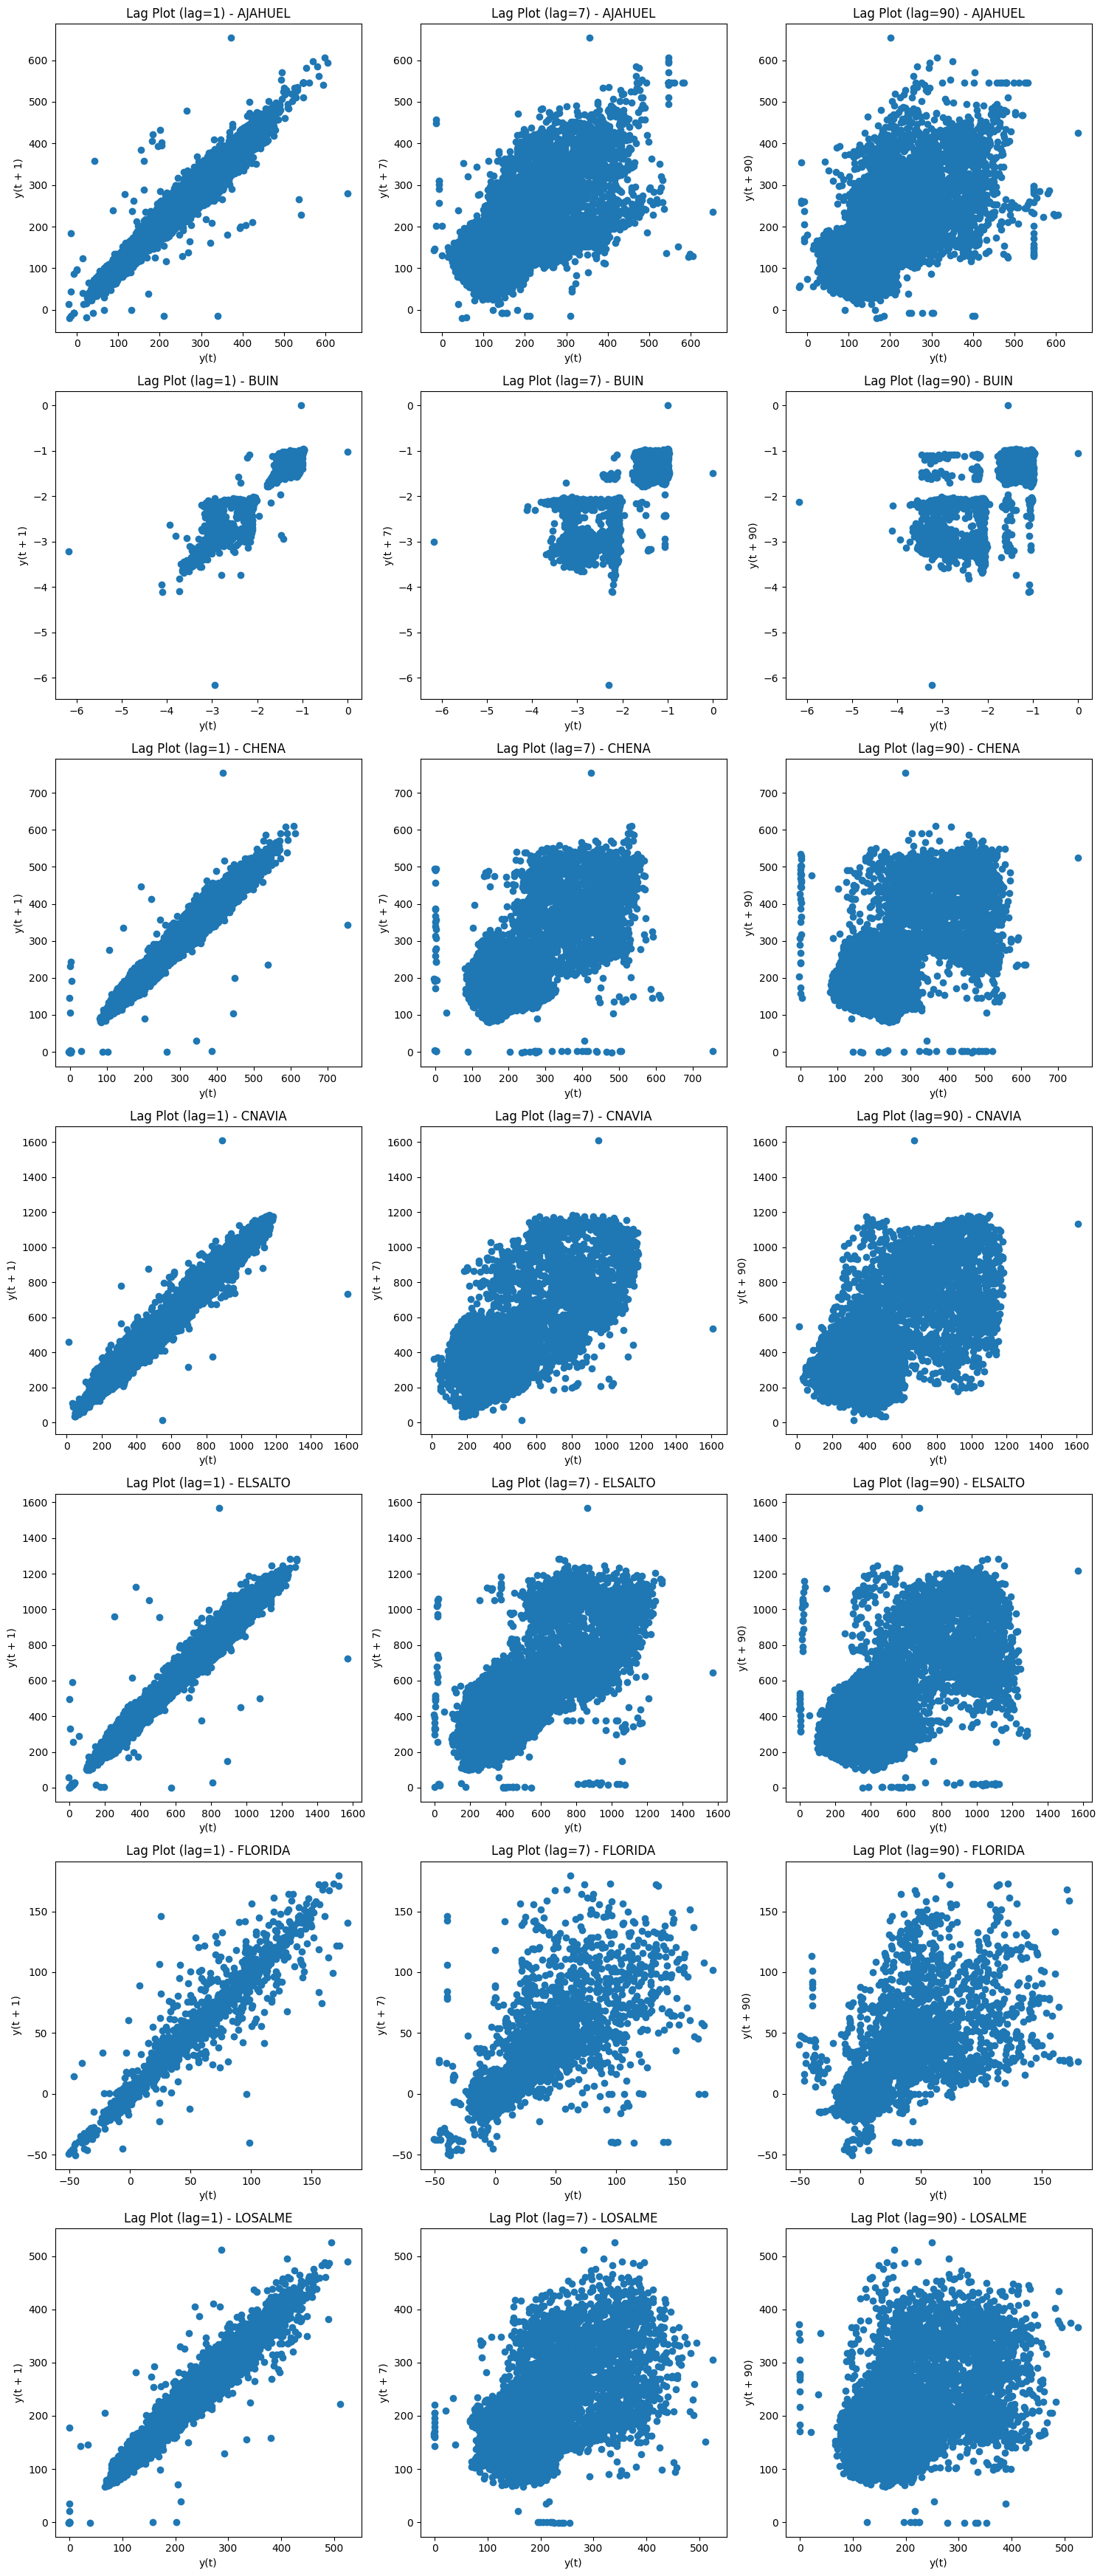

In [53]:
# Lista de subestaciones únicas
substations = data['substation'].unique()

# Parámetros para los lags
lags = [1, 7, 90]  # Puedes ajustar esta lista para incluir los lags que desees

# Número de subestaciones
num_substations = len(substations)

# Crear el gráfico
fig, axes = plt.subplots(num_substations, len(lags), figsize=(15, num_substations * 5))

# Si solo hay una subestación, 'axes' no será un array bidimensional, por lo que necesitamos manejar ese caso
if num_substations == 1:
    axes = [axes]

for i, substation in enumerate(substations):
    # Filtrar los datos para la subestación actual
    df_substation = data[data['substation'] == substation]['consumption']
    df_substation = pd.DataFrame(df_substation, dtype=float)
    
    for j, lag in enumerate(lags):
        # Graficar lag plot
        pd.plotting.lag_plot(df_substation, lag=lag, ax=axes[i][j] if num_substations > 1 else axes[j])
        axes[i][j].set_title(f'Lag Plot (lag={lag}) - {substation}' if num_substations > 1 else f'Lag Plot (lag={lag})')

# Ajustar el diseño para que no se solapen los gráficos
plt.tight_layout()
plt.show()

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

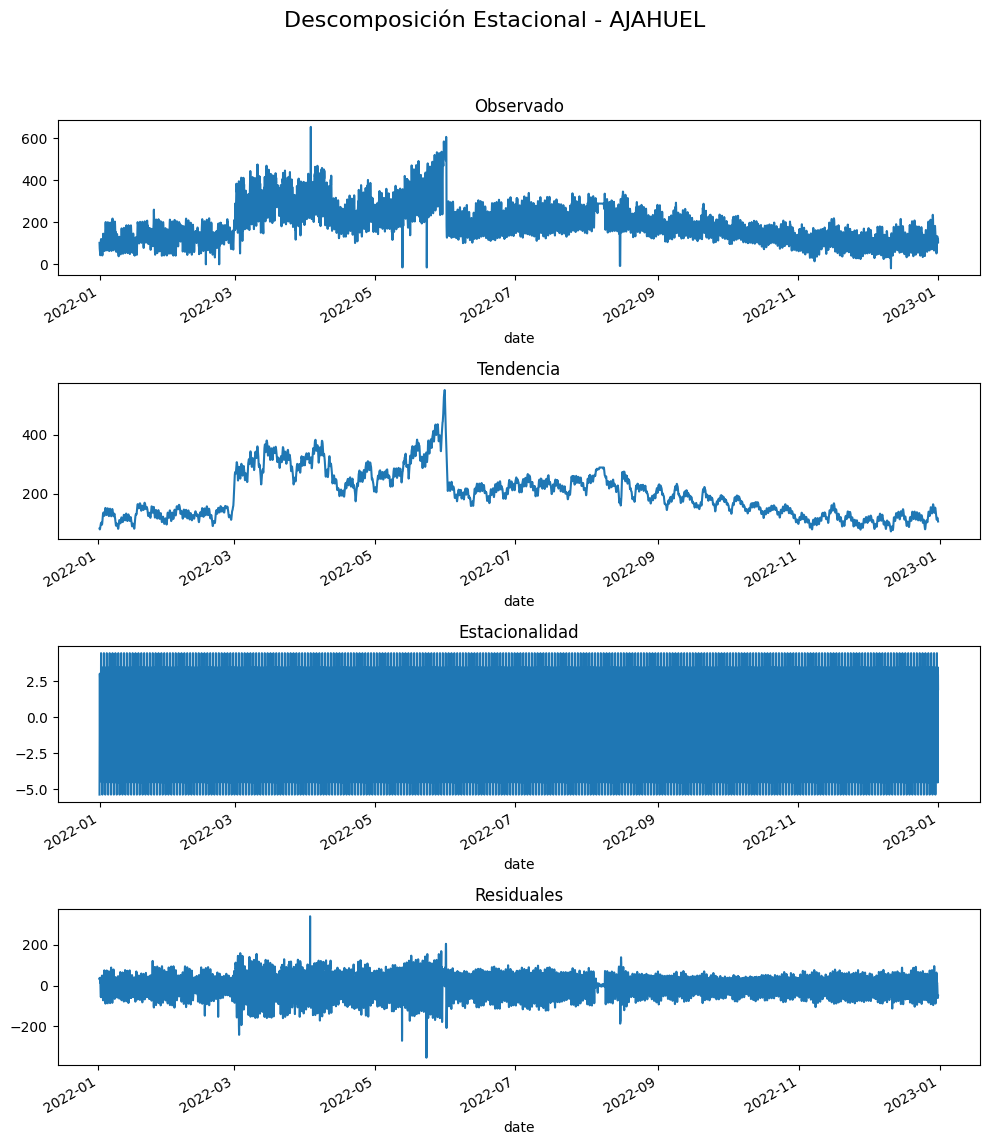

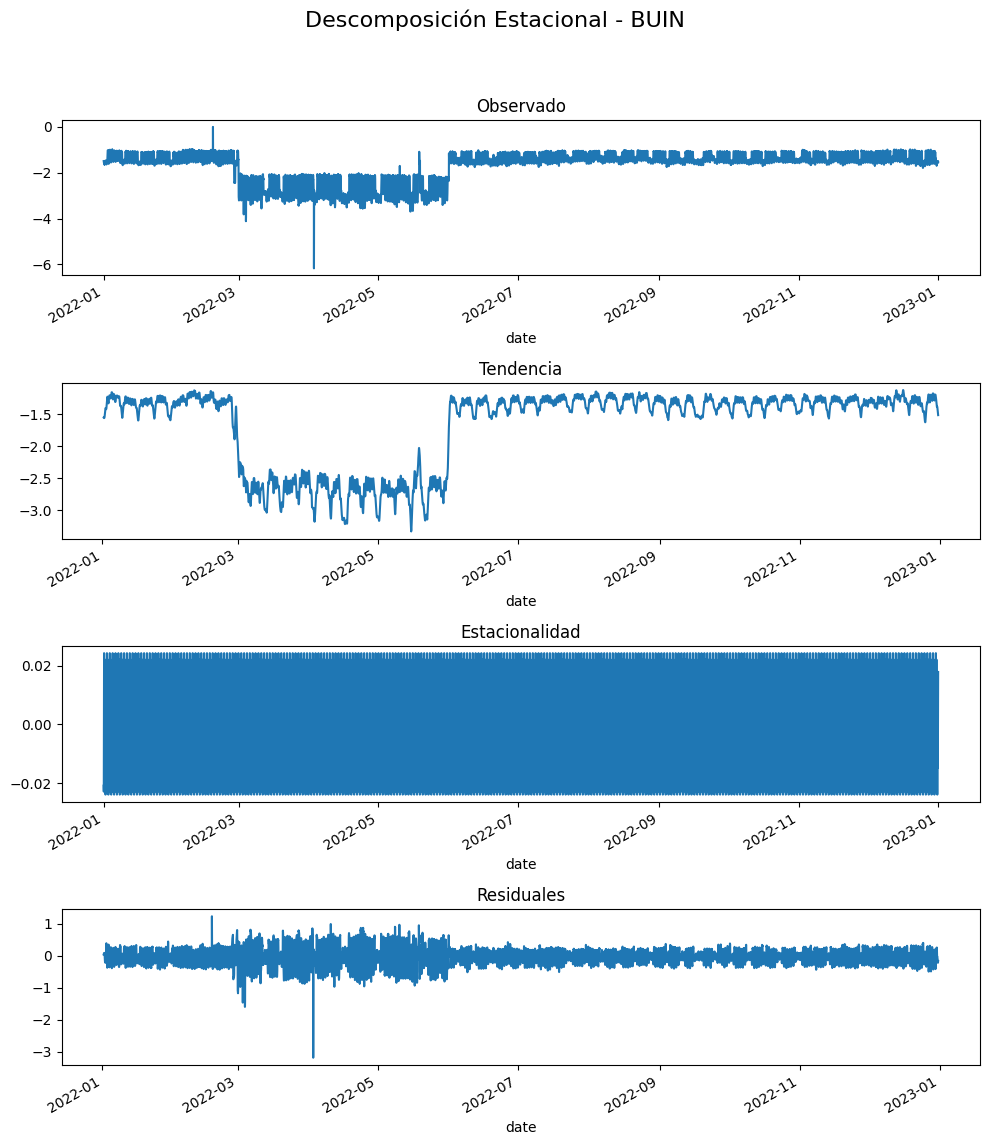

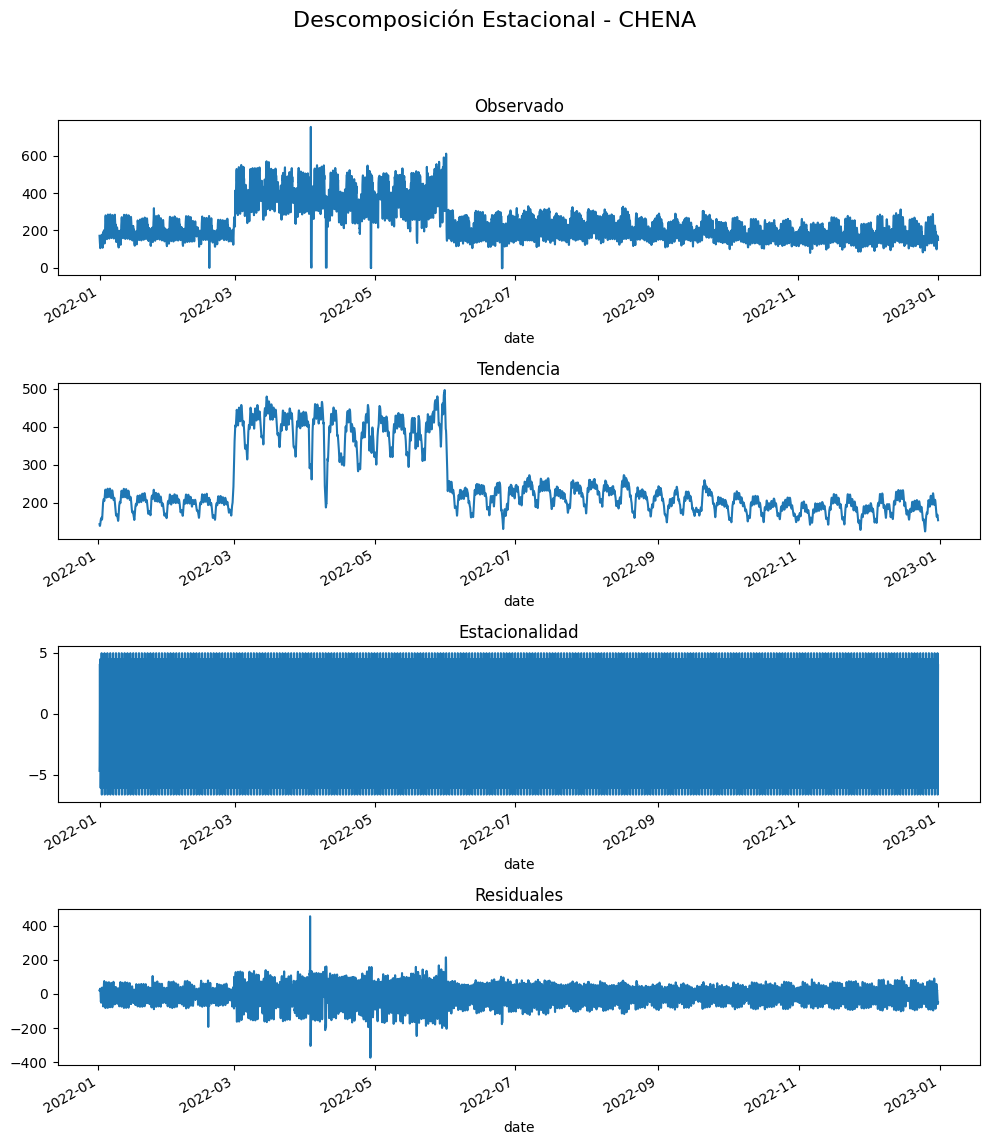

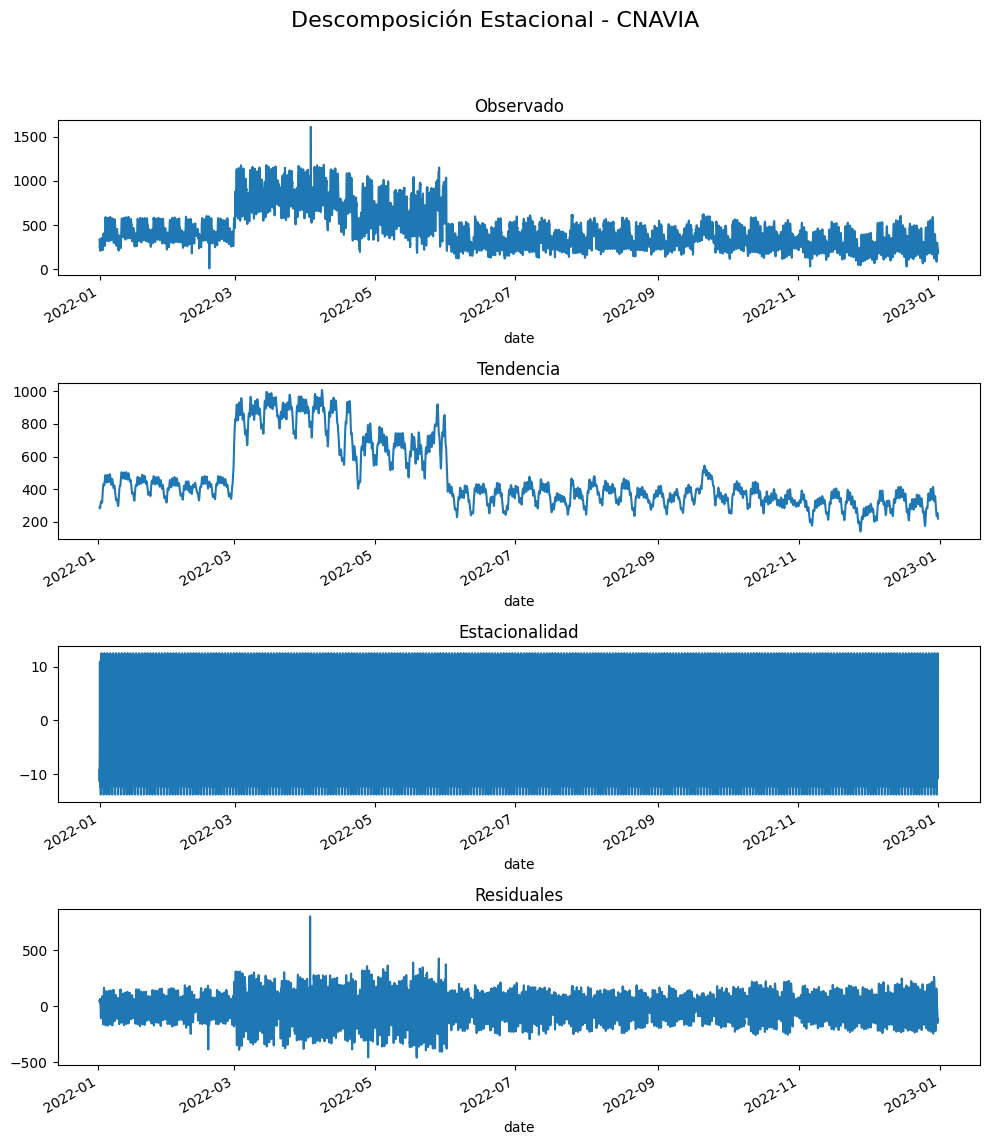

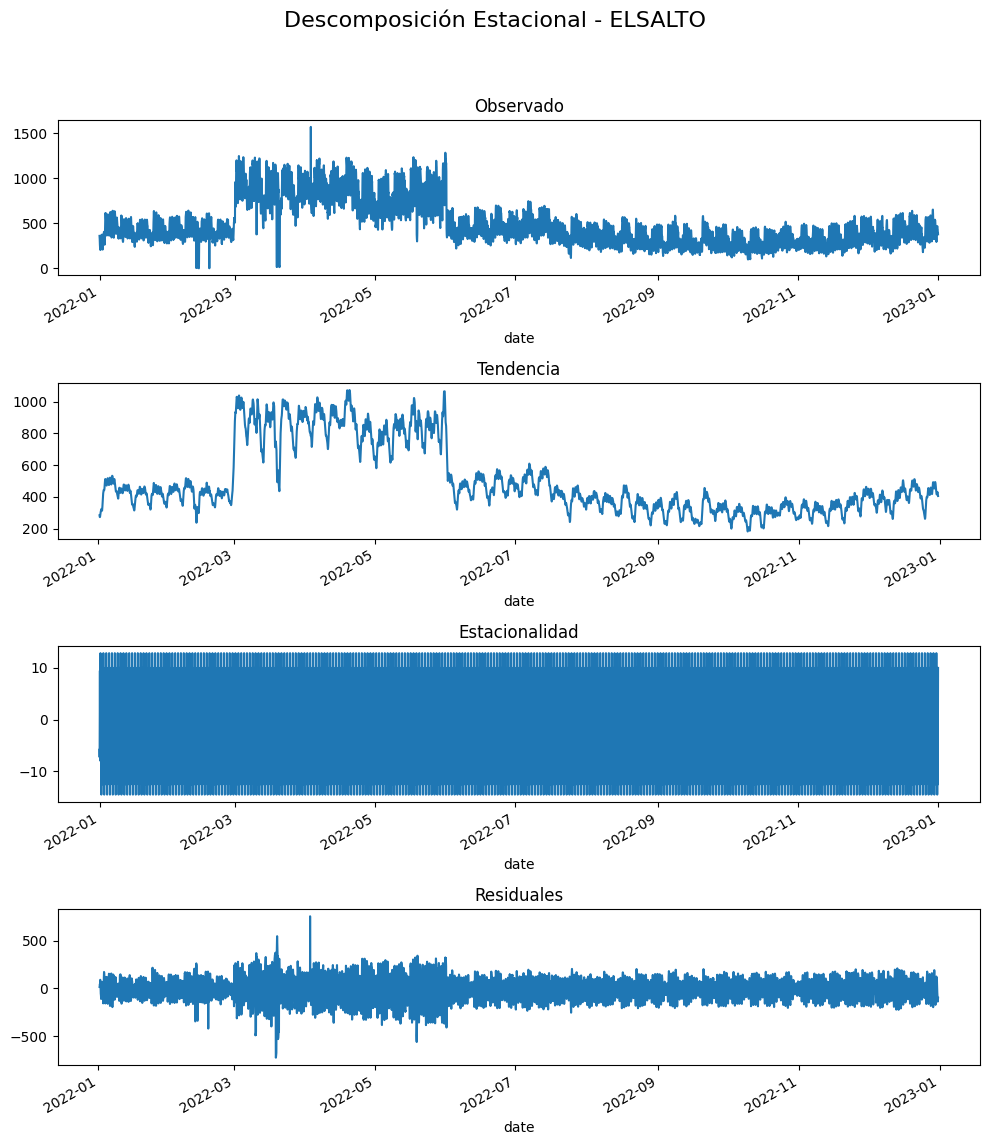

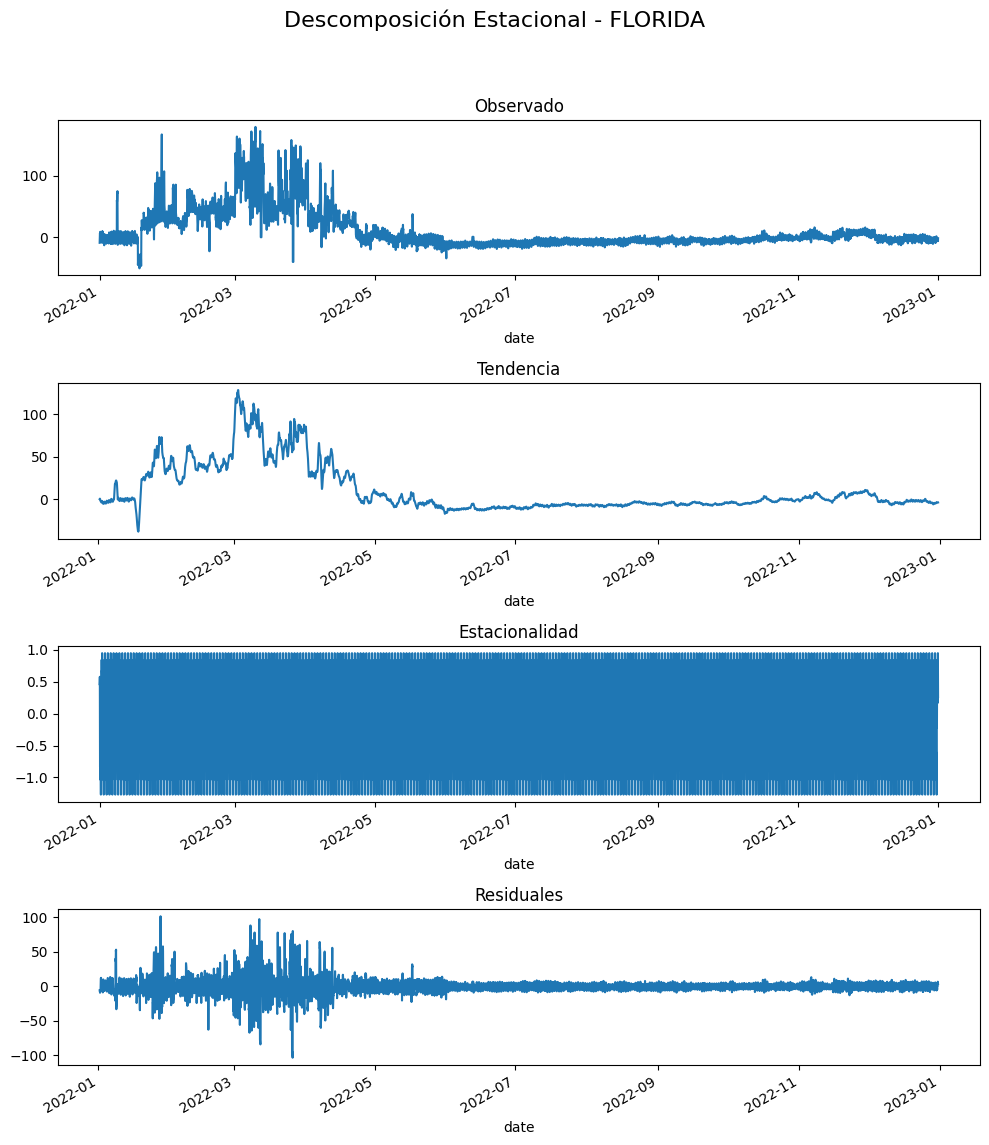

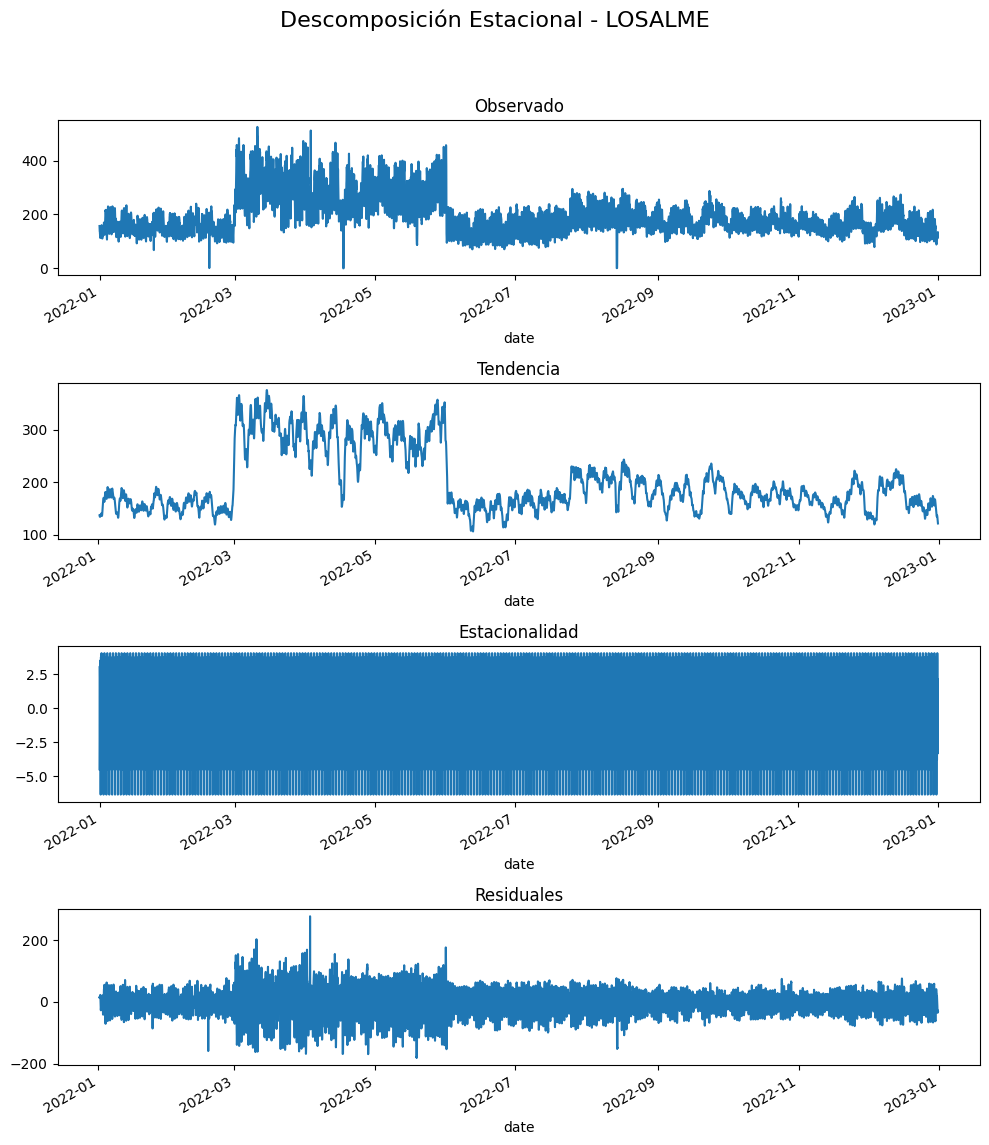

In [59]:
# Lista de subestaciones únicas
substations = data['substation'].unique()

# Parámetro para el período de la descomposición estacional
period = 30  # Ajusta esto según el período de tus datos

# Graficar la descomposición estacional para cada subestación
for substation in substations:
    # Filtrar los datos para la subestación actual
    data_substation = data[data['substation'] == substation]['consumption']
    
    # Aplicar la descomposición estacional
    resultado = seasonal_decompose(data_substation, model='additive', period=period)
    
    # Crear una figura para cada subestación
    fig, axes = plt.subplots(4, 1, figsize=(10, 12))
    fig.suptitle(f'Descomposición Estacional - {substation}', fontsize=16)
    
    # Graficar los componentes de la descomposición
    resultado.observed.plot(ax=axes[0], title='Observado')
    resultado.trend.plot(ax=axes[1], title='Tendencia')
    resultado.seasonal.plot(ax=axes[2], title='Estacionalidad')
    resultado.resid.plot(ax=axes[3], title='Residuales')
    
    # Ajustar el diseño para que no se solapen los gráficos
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [50]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(y,maxlag=1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -25.263083
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [27]:
df_s1.rolling(120).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
61308,150.575316
61309,150.219605
61310,149.794082
61311,149.494184


In [26]:
!pip install utils

from utils import plot_periodogram
plot_periodogram(y);

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13905 sha256=4f5627a90799bd8a26b94d748019042305b60c64624a61ff4c2f65e794351dc5
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


ImportError: cannot import name 'plot_periodogram' from 'utils' (/usr/local/lib/python3.10/dist-packages/utils/__init__.py)

In [34]:
data=pd.read_csv("train.csv",sep=",")
data["date"]=pd.to_datetime(data["date"],format="%d-%m-%y %h:%m")
data=data.set_index("date")
data.head()

ValueError: 'h' is a bad directive in format '%d-%m-%y %h:%m'

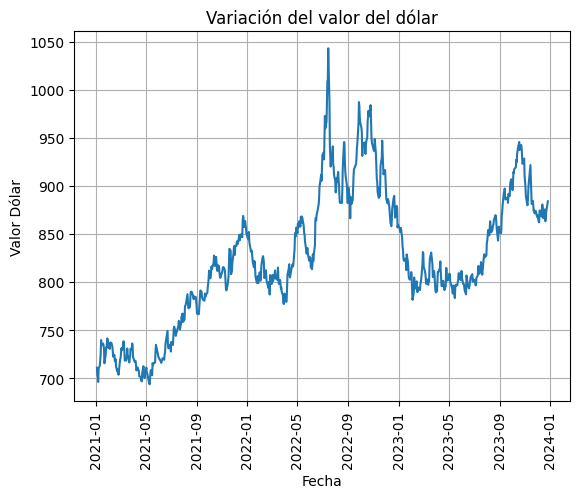

In [ ]:
y=data["valor"]
x=data.index
plt.plot(x,y);
plt.xticks(rotation=90);
plt.grid(True);
plt.xlabel("Fecha");
plt.ylabel("Valor Dólar");
plt.title("Variación del valor del dólar");